In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
NIO_2yrs = pd.read_csv("NIO_STOCK_DATA_10yrs.csv", index_col=0)

In [4]:
NIO_2yrs['timestamp']=pd.to_datetime(NIO_2yrs['timestamp'])

In [5]:
NIO_2yrs["Date"] = NIO_2yrs["timestamp"]

In [18]:
# we make the timestamp the index so as to use timestamp slicing below
# run this code box just once, other times would return a KeyError
NIO_2yrs = NIO_2yrs.set_index("timestamp")

KeyError: "None of ['timestamp'] are in the columns"

In [6]:
NIO_2yrs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2018-09-12 to 2021-01-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   598 non-null    float64       
 1   Open    598 non-null    float64       
 2   Low     598 non-null    float64       
 3   High    598 non-null    float64       
 4   Volume  598 non-null    int64         
 5   Date    598 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 32.7 KB


In [8]:
NIO_2yrs.describe(include= 'all')

,Close,Open,Low,High,Volume,Date
count,598.000000,598.000000,598.000000,598.000000,5.980000e+02,598
unique,NaN,NaN,NaN,NaN,NaN,598
top,NaN,NaN,NaN,NaN,NaN,2020-08-26 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,1
first,NaN,NaN,NaN,NaN,NaN,2018-09-12 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2021-01-27 00:00:00
mean,10.892149,10.869130,10.419281,11.291371,6.717410e+07,NaN
std,13.988525,13.956644,13.364406,14.468684,7.790910e+07,NaN
min,1.320000,1.190000,1.190000,1.450000,5.111000e+06,NaN
25%,3.182500,3.142500,3.055000,3.270000,1.996672e+07,NaN


In [9]:
NIO_2yrs.isnull().sum()

Close     0
Open      0
Low       0
High      0
Volume    0
Date      0
dtype: int64

In [7]:
NIO_2yrs

,Close,Open,Low,High,Volume,Date
timestamp,,,,,,
2018-09-12,6.600000,6.000000,5.350000,6.930000,66849000,2018-09-12
2018-09-13,11.600000,6.620000,6.520000,12.690000,158346500,2018-09-13
2018-09-14,9.900000,12.660000,9.220000,13.800000,172473600,2018-09-14
2018-09-17,8.500000,9.610000,8.500000,9.750000,56323900,2018-09-17
2018-09-18,7.680000,8.730000,7.670000,9.100000,41827600,2018-09-18
...,...,...,...,...,...,...
2021-01-21,58.340000,57.020000,55.880001,58.580002,73119500,2021-01-21
2021-01-22,61.950001,58.950001,58.320000,62.169998,133918100,2021-01-22
2021-01-25,59.990002,64.050003,58.349998,64.519997,111986400,2021-01-25


This code Below is called timestamp slicing, it is very similar to pyhton index slicing but this time We are dataframe index slicing

# example 1

In [7]:
# This slices from the beginnning of 2019 to the end
# as you can see  with the head and tail functions
NIO_2019 = NIO_2yrs["2019":"2019"]
NIO_2019.head()

,Close,Open,Low,High,Volume,Date
timestamp,,,,,,
2019-01-02,6.20,6.13,6.00,6.24,8823600,2019-01-02
2019-01-03,6.05,6.10,6.02,6.15,7562900,2019-01-03
2019-01-04,6.36,6.19,6.13,6.40,9405600,2019-01-04
2019-01-07,6.50,6.41,6.31,6.59,9709000,2019-01-07
2019-01-08,6.40,6.57,6.17,6.58,9603800,2019-01-08


In [8]:
NIO_2019.tail()

,Close,Open,Low,High,Volume,Date
timestamp,,,,,,
2019-12-24,2.53,2.63,2.45,2.63,32029800,2019-12-24
2019-12-26,2.51,2.45,2.35,2.52,44173700,2019-12-26
2019-12-27,2.42,2.54,2.41,2.55,37553300,2019-12-27
2019-12-30,3.72,2.92,2.88,4.87,432720700,2019-12-30
2019-12-31,4.02,4.15,3.82,4.42,215008600,2019-12-31


# example 2

In [9]:
# This slices from the whole of January 2019
NIO_2019_jan_1 = NIO_2yrs["2019-1":"2019-1"]

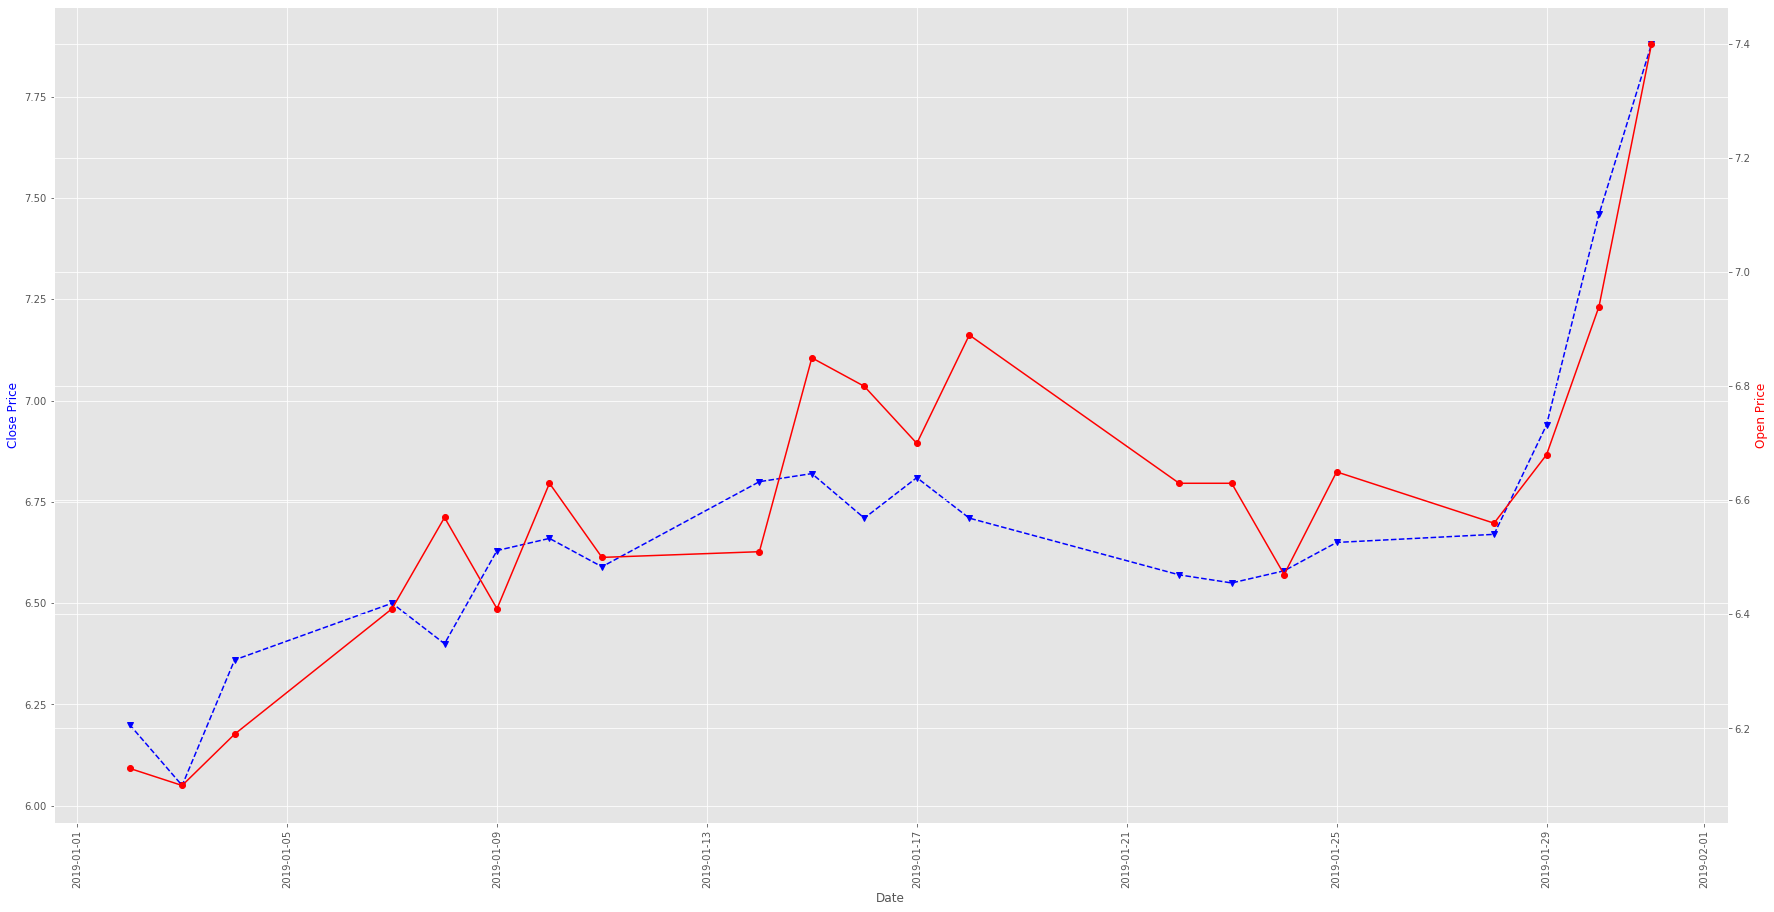

In [17]:
# plotting a graph of whole of January 2019's Open and Close price in the same graph
# this matplotlib code syntax isnt common, pls use another code syntax if youre not comfortable with this one
# you can contact khaleed if you have any questions regarding this
plt.style.use("ggplot")
fig, ax = plt.subplots()
fig.set_size_inches([30, 15])
ax.plot(NIO_2019_jan_1.index, NIO_2019_jan_1["Close"], color='blue', marker="v", linestyle="--")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price", color='blue')
ax.set_xticklabels(NIO_2019_jan_1.index, rotation=90)

ax2 = ax.twinx()
ax2.plot(NIO_2019_jan_1.index, NIO_2019_jan_1["Open"], color='red', marker="o")
ax2.set_ylabel("Open Price", color='red')
# save the picture on your local machine to visualize properly
fig.savefig("NIO_jan_2019.png", dpi=300)